<a href="https://colab.research.google.com/github/Abdulrahman-Ayman-Farid/CodeAlpha_Image_Recognition_Project/blob/main/CatAndDogsClassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow matplotlib


In [ ]:
import os
import zipfile

# Download the dataset
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

# Unzip the dataset
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

# Define directories
base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')


--2024-05-30 18:43:19--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.207, 74.125.197.207, 74.125.135.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   183MB/s    in 0.4s    

2024-05-30 18:43:19 (183 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



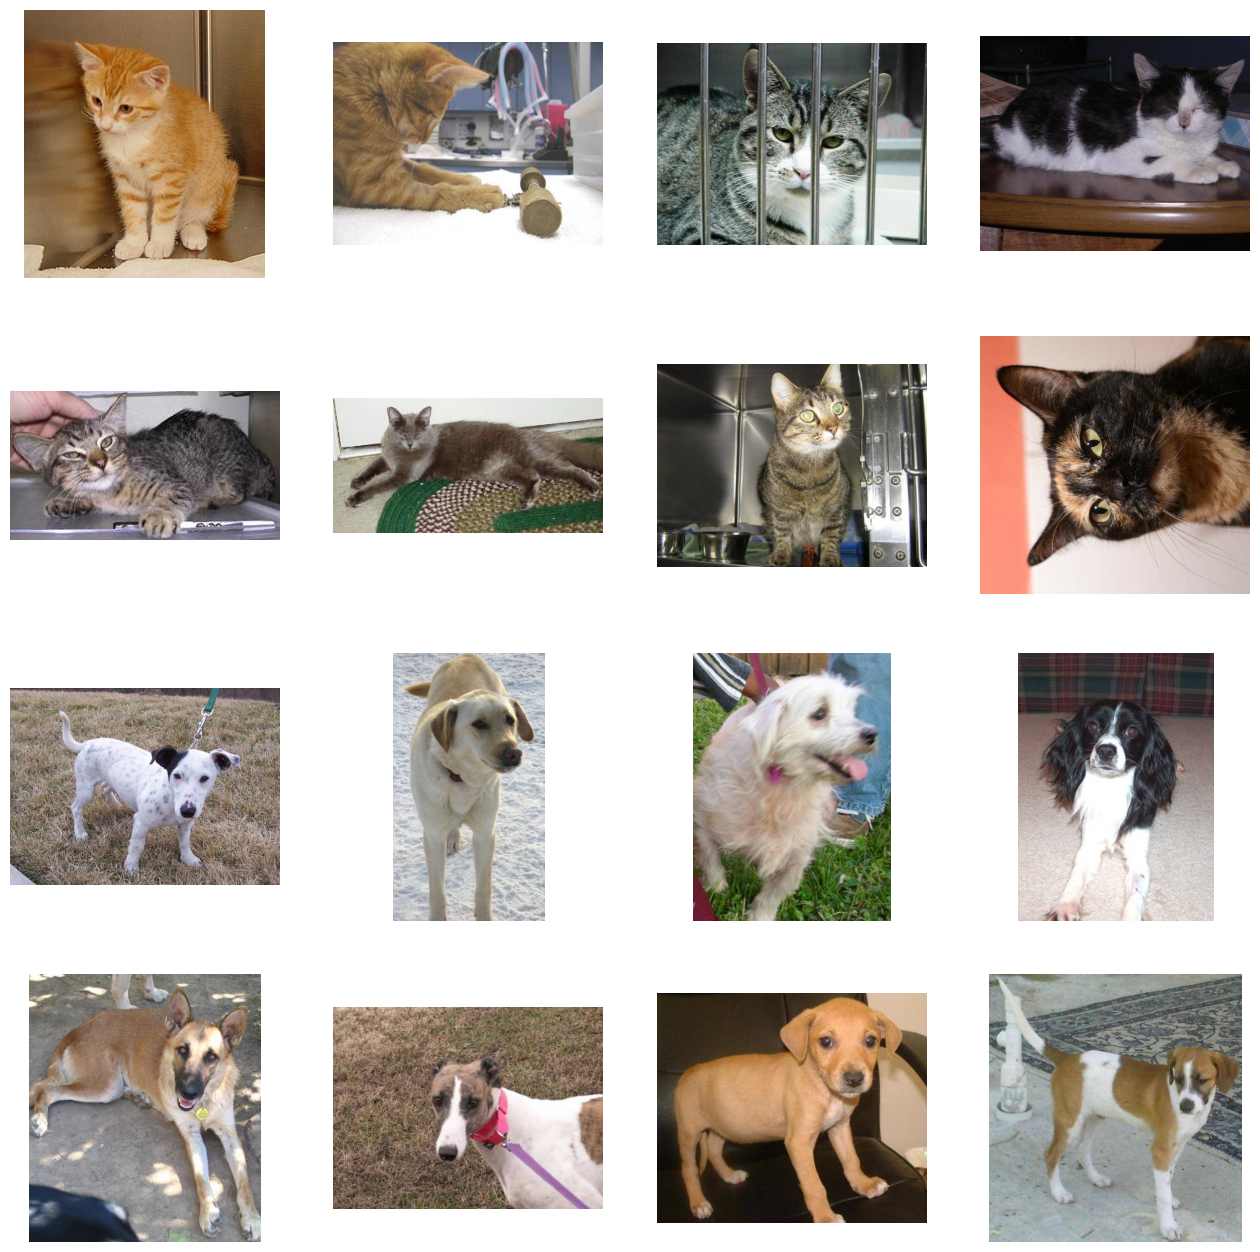

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Set up matplotlib figure, and size it to fit 4x4 pics
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 100

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224))

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224))



Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(base_model.input, x)

# Update the optimizer to use 'learning_rate' instead of 'lr'
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


In [7]:
import os
import zipfile
import wget

# Download the dataset
url = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
local_zip = '/tmp/cats_and_dogs_filtered.zip'

# Ensure the directory exists
if not os.path.exists('/tmp'):
    os.makedirs('/tmp')

# Download the file
wget.download(url, local_zip)

# Unzip the dataset
with zipfile.ZipFile(local_zip, 'r') as zip_ref:
    zip_ref.extractall('/tmp')


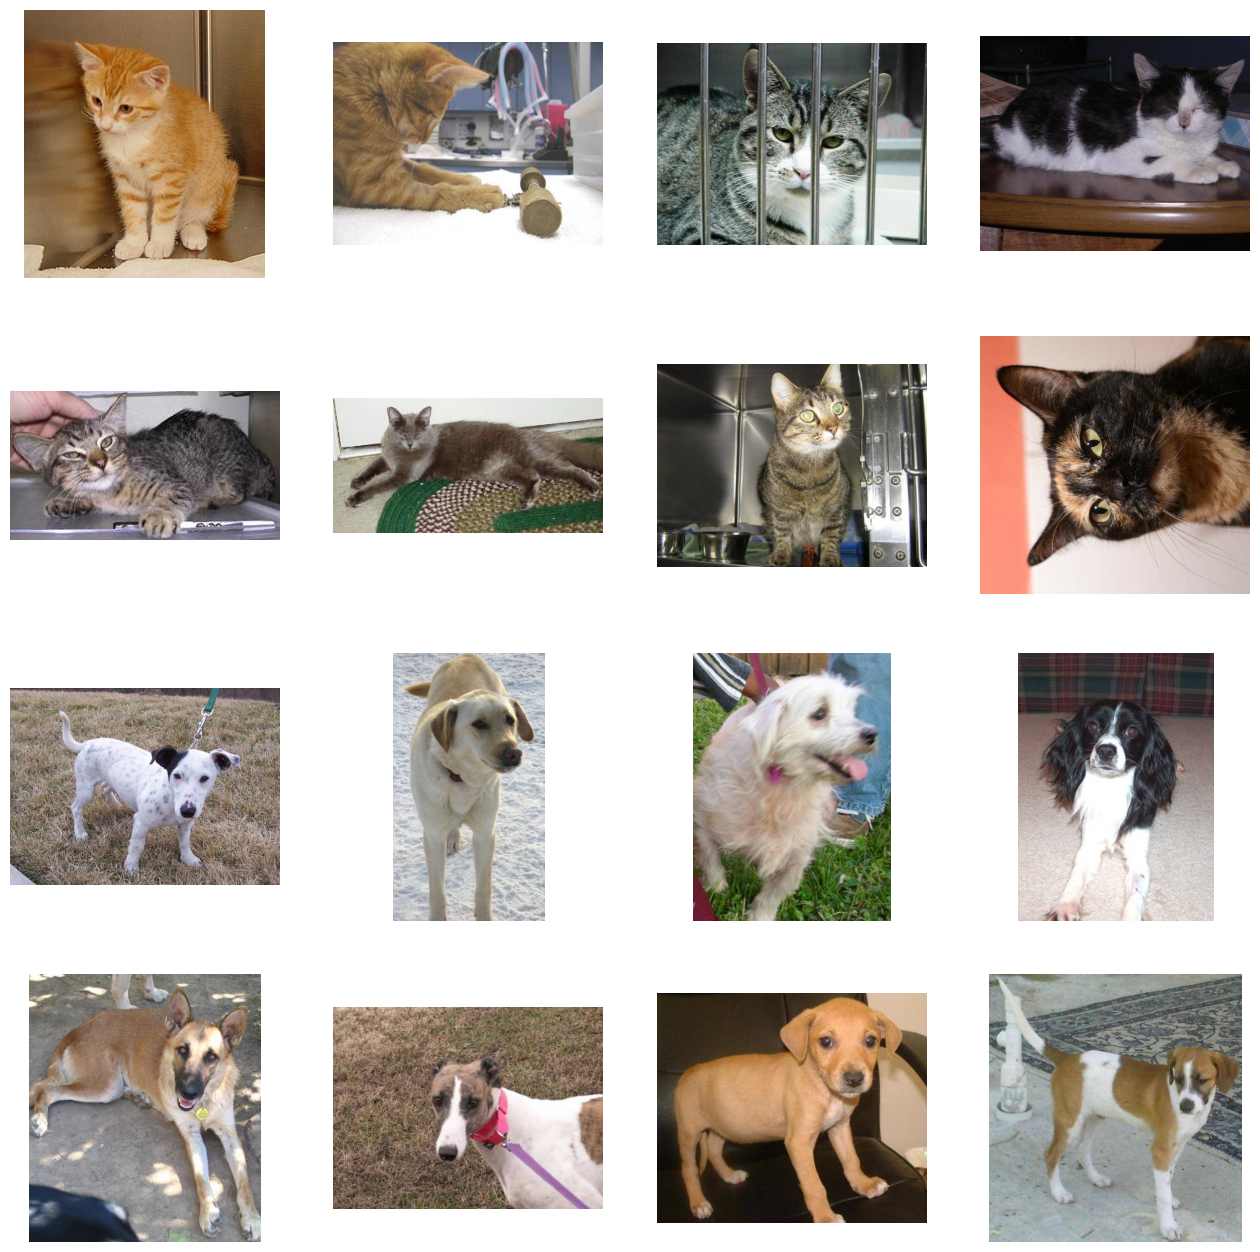

In [8]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# Verify images (optional)
nrows = 4
ncols = 4
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)
pic_index = 100

train_cat_fnames = os.listdir(train_cats_dir)
train_dog_fnames = os.listdir(train_dogs_dir)

next_cat_pix = [os.path.join(train_cats_dir, fname)
                for fname in train_cat_fnames[pic_index-8:pic_index]]
next_dog_pix = [os.path.join(train_dogs_dir, fname)
                for fname in train_dog_fnames[pic_index-8:pic_index]]

for i, img_path in enumerate(next_cat_pix + next_dog_pix):
    sp = plt.subplot(nrows, ncols, i + 1)
    sp.axis('Off')
    img = mpimg.imread(img_path)
    plt.imshow(img)

plt.show()


In [9]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Data augmentation and generators
train_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1.0/255.)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224))

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    batch_size=20,
    class_mode='binary',
    target_size=(224, 224))


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models
from tensorflow.keras.optimizers import RMSprop

base_model = VGG16(input_shape=(224, 224, 3), include_top=False, weights='imagenet')

for layer in base_model.layers:
    layer.trainable = False

x = layers.Flatten()(base_model.output)
x = layers.Dense(512, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = models.Model(base_model.input, x)

# Compile the model
model.compile(optimizer=RMSprop(learning_rate=0.0001),
              loss='binary_crossentropy',
              metrics=['acc'])


58889256/58889256 [==============================] - 0s 0us/step


In [11]:
vgghist = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch=100,
    epochs=10,
    validation_steps=50,
    verbose=2)


Epoch 1/10
100/100 - 1677s - loss: 0.6810 - acc: 0.6765 - val_loss: 0.3371 - val_acc: 0.8650 - 1677s/epoch - 17s/step
Epoch 2/10
100/100 - 1668s - loss: 0.4581 - acc: 0.7890 - val_loss: 0.2783 - val_acc: 0.8800 - 1668s/epoch - 17s/step
Epoch 3/10
100/100 - 1661s - loss: 0.4241 - acc: 0.8050 - val_loss: 0.2374 - val_acc: 0.9020 - 1661s/epoch - 17s/step
Epoch 4/10
100/100 - 1657s - loss: 0.3843 - acc: 0.8215 - val_loss: 0.2263 - val_acc: 0.9130 - 1657s/epoch - 17s/step
Epoch 5/10
100/100 - 1663s - loss: 0.3785 - acc: 0.8245 - val_loss: 0.2076 - val_acc: 0.9160 - 1663s/epoch - 17s/step
Epoch 6/10
100/100 - 1664s - loss: 0.3486 - acc: 0.8380 - val_loss: 0.6387 - val_acc: 0.7450 - 1664s/epoch - 17s/step
Epoch 7/10
100/100 - 1633s - loss: 0.3408 - acc: 0.8575 - val_loss: 0.1990 - val_acc: 0.9260 - 1633s/epoch - 16s/step
Epoch 8/10
100/100 - 1663s - loss: 0.3213 - acc: 0.8610 - val_loss: 0.2056 - val_acc: 0.9190 - 1663s/epoch - 17s/step
Epoch 9/10
100/100 - 1665s - loss: 0.3239 - acc: 0.8545 

In [12]:
loss, accuracy = model.evaluate(validation_generator, steps=50)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")


50/50 [==============================] - 529s 11s/step - loss: 0.1900 - acc: 0.9300
Validation Loss: 0.18995824456214905
Validation Accuracy: 0.9300000071525574


In [13]:
model.save('cats_and_dogs_vgg16.h5')
print("Model saved successfully!")



/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Model saved successfully!


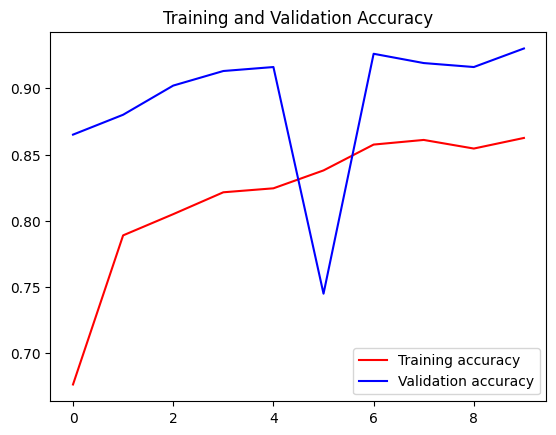

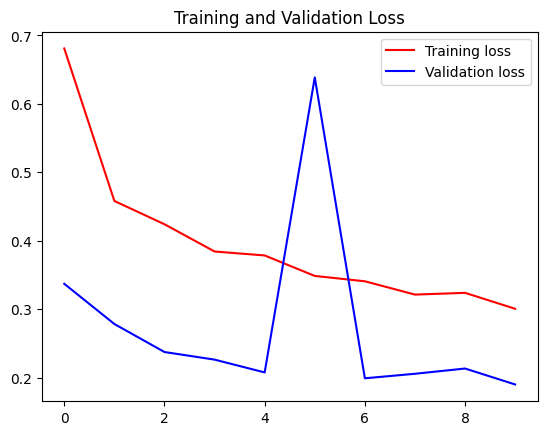

In [14]:
import matplotlib.pyplot as plt

# Retrieve accuracy and loss values from training history
acc = vgghist.history['acc']
val_acc = vgghist.history['val_acc']
loss = vgghist.history['loss']
val_loss = vgghist.history['val_loss']

epochs = range(len(acc))

# Plot Training and Validation Accuracy
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.figure()

# Plot Training and Validation Loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()



In [23]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input

# Function to load and preprocess the image
def load_image(img_path):
    # Load the image
    img = image.load_img(img_path, target_size=(224, 224))
    # Convert the image to an array
    img_array = image.img_to_array(img)
    # Expand dimensions to match the expected input shape: (1, 224, 224, 3)
    img_array = np.expand_dims(img_array, axis=0)
    # Preprocess the image (same preprocessing as used during training)
    img_array = preprocess_input(img_array)
    return img_array

# Path to the test image
img_path = '/content/cat3.jpg'  # Replace with your image path

# Load and preprocess the image
new_image = load_image(img_path)

# Make prediction
prediction = model.predict(new_image)
print(f"Prediction: {'Dog' if prediction[0] > 0.5 else 'Cat'}")


1/1 [==============================] - 0s 487ms/step
Prediction: Cat
